In [103]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler , LabelEncoder

In [104]:
df = pd.read_csv(r"D:\ml deployment\classification-demo\credit_rating_prediction_dataset.csv")
df.head()

,id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [105]:
X = df.drop("class" , axis=1)
y = df["class"]

In [106]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=1)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      1000 non-null   int64 
 1   checking_status         1000 non-null   object
 2   duration                1000 non-null   int64 
 3   credit_history          1000 non-null   object
 4   purpose                 1000 non-null   object
 5   credit_amount           1000 non-null   int64 
 6   savings_status          1000 non-null   object
 7   employment              1000 non-null   object
 8   installment_commitment  1000 non-null   int64 
 9   personal_status         1000 non-null   object
 10  other_parties           1000 non-null   object
 11  residence_since         1000 non-null   int64 
 12  property_magnitude      1000 non-null   object
 13  age                     1000 non-null   int64 
 14  other_payment_plans     1000 non-null   object
 15  housi

In [108]:
object_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(include=['number']).columns

In [109]:
features_to_label =['checking_status', 'credit_history', 'purpose','savings_status', 'employment',
        'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans',
       'housing', 'job',  'own_telephone',
       'foreign_worker']

features_to_scale = ['id', 'duration' , 'credit_amount' , 'installment_commitment' , 'residence_since' , 'age' , 'existing_credits' , 'existing_credits']

In [110]:
label = LabelEncoder() 
for i in object_cols:
    X_train[i] = label.fit_transform(X_train[i])
    X_test[i] = label.fit_transform(X_test[i])

#label.fit(y_train[[features_to_label]]) #object label numeric scalar

In [111]:
scalar = StandardScaler()
#scalar.fit(X_train[features_to_scale])
X_train[numeric_cols] = scalar.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scalar.transform(X_test[numeric_cols])

In [112]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [113]:
y_test_pred = model.predict(X_test)
print(y_test_pred)

['good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' '

In [114]:
comparison = pd.DataFrame({'Actual':y_test , "Predicted":y_test_pred})
print(comparison[0:15])
print(comparison[100:])

    Actual Predicted
507    bad      good
818   good       bad
452   good      good
368    bad       bad
242    bad      good
929   good      good
262   good      good
810   good      good
318   good      good
49    good      good
446    bad       bad
142   good      good
968   good      good
345   good      good
971   good      good
    Actual Predicted
335    bad      good
13     bad      good
911    bad       bad
156   good      good
428   good      good
..     ...       ...
430   good      good
874   good       bad
550   good      good
608   good      good
207   good      good

[100 rows x 2 columns]


In [115]:
accuracy=accuracy_score(y_test,y_test_pred)
confusion_matrix =  confusion_matrix(y_test,y_test_pred)
classification_report = classification_report(y_test,y_test_pred)

In [116]:
print(f"Accuracy :\n {accuracy:.4f}")  
print("Confusion Matrix :\n" , confusion_matrix)  
print("Classification Report :\n" , classification_report)

Accuracy :
 0.7250
Confusion Matrix :
 [[ 20  39]
 [ 16 125]]
Classification Report :
               precision    recall  f1-score   support

         bad       0.56      0.34      0.42        59
        good       0.76      0.89      0.82       141

    accuracy                           0.73       200
   macro avg       0.66      0.61      0.62       200
weighted avg       0.70      0.72      0.70       200



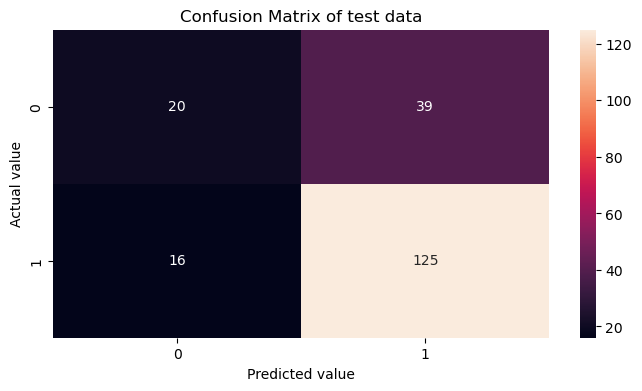

In [117]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix,annot=True ,fmt='d')
plt.title("Confusion Matrix of test data")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()

In [118]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

In [119]:
recall = TP/(TP+FN)
precision = TP/(TP+FP)
specificity = TN/(TN+FP)
accuracy = (TP+TN)/(TP+FP+FN+TN)
f1_score = 2*(recall*precision)/(recall+precision)

In [120]:
print(f"Recall : {recall:.4f}")
print(f"Precision : {precision:.4f}")
print(f"F1 Score : {f1_score:.4f}")
print(f"Specificity : {specificity:.4f}")
print(f"Accuracy : {accuracy:.4f}")

Recall : 0.8865
Precision : 0.7622
F1 Score : 0.8197
Specificity : 0.3390
Accuracy : 0.7250


In [121]:
print("*** Making predictions for new data ***")
new_data = np.array([
    [9,160,70,20,80,28,0.5,34,9,160,70,20,80,28,0.5,34,9,160,70,20,80],
    [0,104,70,15,0,21,0.1,29,0,104,70,15,0,21,0.1,29,0,104,70,15,0],
    [2,158,90,0,0,31.6,1.072,66,2,158,90,0,0,31.6,1.072,66,2,158,90,0,0,],
    [1,100,66,15,56,23.6,0.666,26,1,100,66,15,56,23.6,0.666,26,1,100,66,15,56]
]) 

*** Making predictions for new data ***


In [122]:
new_data_df = pd.DataFrame(data=new_data , columns= X_train.columns)

In [123]:
new_data_df= new_data_df.fillna(0)
new_data_df.head()

,id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,9.0,160.0,70.0,20.0,80.0,28.0,0.500,34.000,22.0,45.0,...,11.0,0.0,104.0,70.0,15.0,0.000,21.0,0.1,29.0,32.0
1,2.0,158.0,90.0,0.0,0.0,31.6,1.072,66.000,32.0,44.0,...,44.0,66.0,15.0,56.0,23.6,0.666,26.0,22.0,22.0,34.0
2,4.0,120.0,72.0,0.0,0.0,30.0,0.500,1.072,66.0,32.0,...,11.0,44.0,66.0,15.0,56.0,23.600,0.1,29.0,32.0,1.0
3,9.0,160.0,70.0,20.0,80.0,28.0,0.500,34.000,22.0,45.0,...,11.0,0.0,104.0,70.0,15.0,0.000,21.0,0.1,29.0,32.0


In [124]:
new_data_scaled = scalar.transform(new_data_df)
new_data_scaled

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- checking_status
- credit_history
- employment
- foreign_worker
- housing
- ...
